Up to this point, we have only discussed about simulations of quantum computers in the absence of noise. In reality, quantum computers are very noise prone and thus we would not get the same results if we were to run the same circuit on an actual computer. Thus in order to simulate and obtain proper results, we need to simulate with noise in mind. Thus we will do just that. First we will use a simple entanglement protocol in perfect conditions to see what a fault tolerant quantum computer can do. Then we will simulate with noise. 

In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import time
from qiskit.circuit import Parameter
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2 


Note that you may replace `FakeQuitoV2` for any IBM quantum computer by simply replacing the `Quito` with the actual name of the computer.




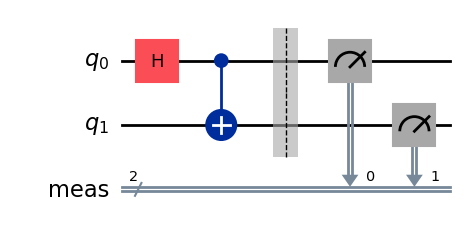

In [14]:
# Constructing the quantum Circuit

qubits = 2

qc = QuantumCircuit(qubits)

qc.h(0)
qc.cx(0,1)
qc.measure_all()

qc.draw("mpl")

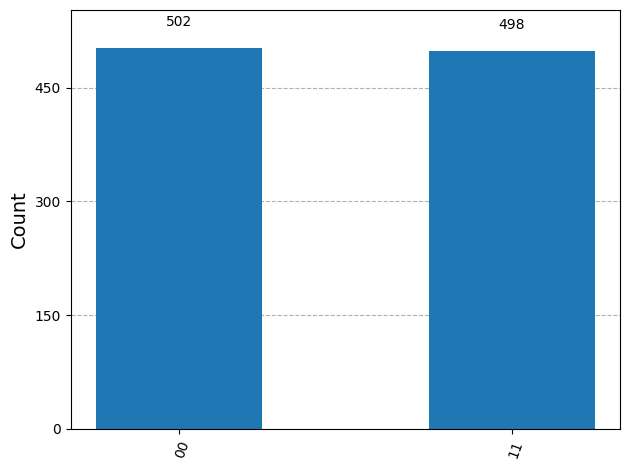

In [25]:
# Simualtion without any noise
simulator = AerSimulator()
transpiled = transpile(qc, simulator)

job = simulator.run(transpiled, shots = 1000).result()

results = job.get_counts()

plot_histogram(results)

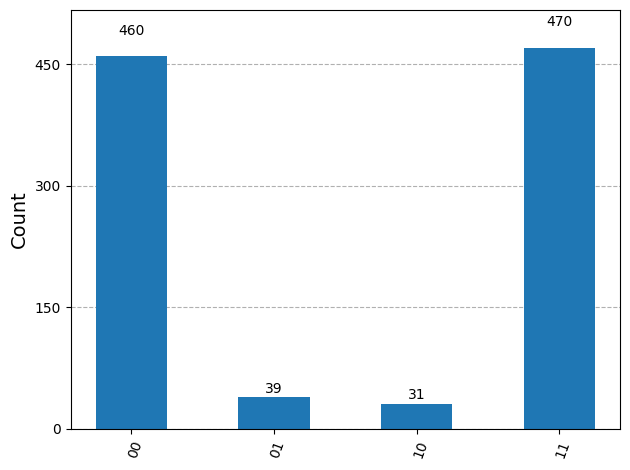

In [26]:
# Simulation now with noise


# Sets up backend stuffs
backend = FakeQuitoV2()

noise_model = NoiseModel.from_backend(backend)
basis_gates = noise_model.basis_gates

transpiled = transpile(qc, backend)

simulator = AerSimulator(noise_model = noise_model, basis_gates = basis_gates)

#Now run it as normal

results = simulator.run(transpiled, shots = 1000).result().get_counts()

plot_histogram(results)

So now note what happens when we include noise, there are now measurements that are no longer strictly entangled! If they were, then all we would get is `00` or `11`, but we also got `01` and `10`. While these are a small portion of the shots, the fact that it happened show how noise can just randomly add extra things into computations which can throw off solutions, making the final result not trustworthy. Luckilly there are ways of implementing error correction, which I might do in another notebook.

Also just for future reference for myself, this is how you simulate errors using QiskitAer. 

First import the quantum computer you will be simulating by using `from qiskit_ibm_runtime.fake_provider import Fake{name}V2`. Then you need to import the noise model by using `noise_model = NoiseModel.from_backend(backend)` where the backend is an instance of the quantum computer you imported earlier. Then obtain the basis gates for this computer by using `basis_gates = noise_model.basis_gates`. Then you need to transpile your quantum circuit using `transpiled = transpile(qc, backend)` which will transpile the circuit to the respective backend. This will turn the circuit into gates that the quantum computer could actually perform. Then create your simulator using the noise model and basis gates defined earlier by using `simulator = AerSimulator(noise_model = noise_model, basis_gates = basis_gates`. Finally you can run a normal sampling or expectation value as usual.